In [1]:
#Reading data from csv file

import pandas as pd
import seaborn as sns
import matplotlib as plt
import os

df = pd.read_csv('C:/Users/Gurkanwal Singh/Desktop/used_cars_catalog.csv', na_values = ['not available', 'unknown', 'other', 'na', ''])
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [2]:
# making the price +ve 
df['price_usd'] = df['price_usd'].abs()

In [3]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [4]:
# Convert to datetime first
df['year_produced'] = pd.to_datetime(df['year_produced'], format="%Y")

# Format back to year only (stores it as an integer)
df['year_produced'] = df['year_produced'].dt.year

In [5]:
#Dropping unnecessery columns
df = df.drop(columns=['model_name','engine_fuel', 'engine_type','state', 'drivetrain','location_region','is_exchangeable','has_warranty','engine_has_gas', 'feature_0', 'feature_1','feature_2','feature_3','feature_4','feature_5','feature_6', 'feature_7', 'feature_8', 'feature_9','duration_listed','up_counter','number_of_photos','color' ])

In [6]:
df.head(5)

,manufacturer_name,transmission,odometer_value,year_produced,engine_capacity,body_type,price_usd
0,Subaru,automatic,190000,2010,2.5,universal,10900.00
1,Subaru,automatic,290000,2002,3.0,universal,5000.00
2,Subaru,automatic,402000,2001,2.5,suv,2800.00
3,Subaru,mechanical,10000,1999,3.0,sedan,9999.00
4,Subaru,automatic,280000,2001,2.5,universal,2134.11


In [7]:
df.isnull().sum()

manufacturer_name     0
transmission          0
odometer_value        0
year_produced         0
engine_capacity      10
body_type             0
price_usd             0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum().any()

False

In [10]:
df.shape

(38521, 7)

In [11]:
df.columns

Index(['manufacturer_name', 'transmission', 'odometer_value', 'year_produced',
       'engine_capacity', 'body_type', 'price_usd'],
      dtype='object')

In [12]:
df_numeric_dtypes = df.select_dtypes(include = ['int', float])
df_numeric_dtypes.head(5)
missing_data = pd.DataFrame(df.isnull().sum(), columns = ['missing'])
missing_data

,missing
manufacturer_name,0
transmission,0
odometer_value,0
year_produced,0
engine_capacity,0
body_type,0
price_usd,0


In [13]:
#cleaned dataset is stored in a DataFrame called 'df'
df.to_csv('cleaned_dataset.csv', index=False)


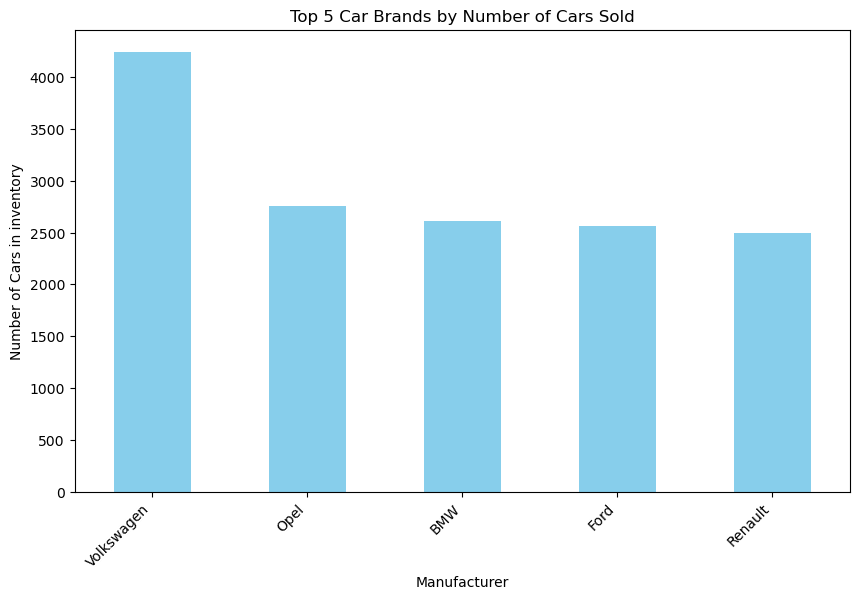

In [14]:
import matplotlib.pyplot as plt 
# Count the number of occurrences of each manufacturer
brand_counts = df['manufacturer_name'].value_counts()

# Select the top 5 manufacturers
top_5_brands = brand_counts.head(5)

# Plot the top 5 brands
plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar', color='skyblue')
plt.title('Top 5 Car Brands by Number of Cars Sold')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars in inventory')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
correlation = df_numeric_dtypes.corr()
correlation

,odometer_value,year_produced,engine_capacity,price_usd
odometer_value,1.000000,-0.488448,0.105704,-0.420965
year_produced,-0.488448,1.000000,0.005059,0.705439
engine_capacity,0.105704,0.005059,1.000000,0.296597
price_usd,-0.420965,0.705439,0.296597,1.000000


<Axes: >

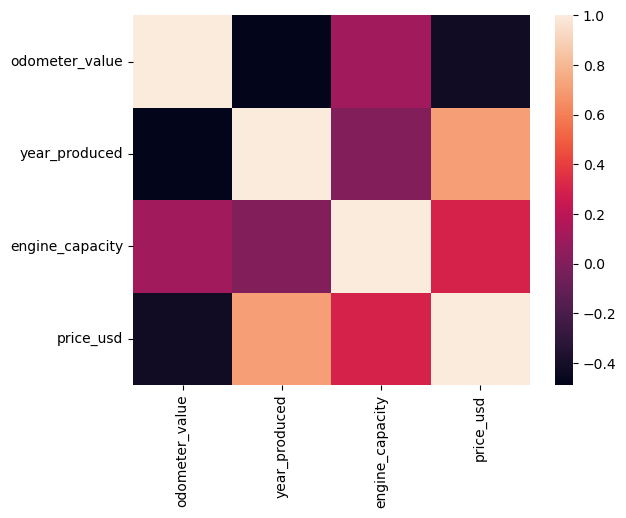

In [16]:
sns.heatmap(correlation)

In [17]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["manufacturer_name"] = labelEncoder.fit_transform(df["manufacturer_name"])
df["body_type"] = labelEncoder.fit_transform(df["body_type"])
df["transmission"] = labelEncoder.fit_transform(df["transmission"])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [20]:
from sklearn.model_selection import train_test_split
#Linear Regression with all features
y = df['price_usd']
x = df.drop(['price_usd'], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions =model.predict(xtest)
r2_train = model.score(xtrain,ytrain)
r2 = model.score(xtest,ytest)
print("R^2 in training set is",r2_train)
print("R2 in test set is ", r2)


R^2 in training set is 0.6115614585693712
R2 in test set is  0.6066374010117901


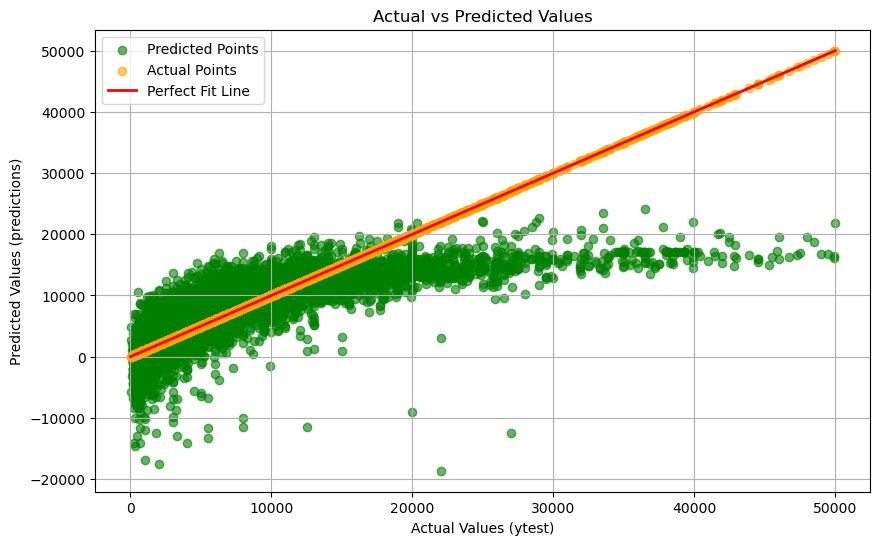

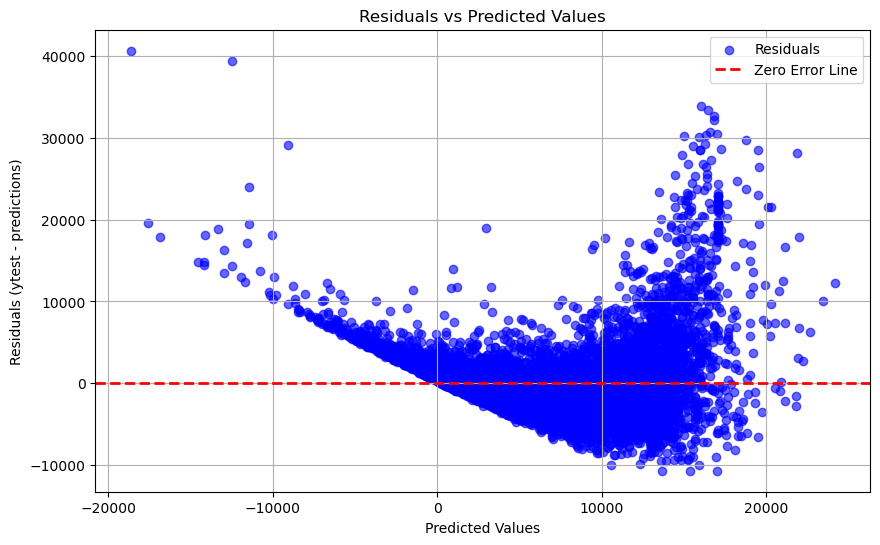

In [21]:
import matplotlib.pyplot as plt  # Ensure this is properly imported

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, predictions, color='green', alpha=0.6, label='Predicted Points')  # Predicted points in green
plt.scatter(ytest, ytest, color='orange', alpha=0.6, label='Actual Points')  # Actual points in orange
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linewidth=2, label='Perfect Fit Line')  # Perfect fit line in red
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (ytest)')
plt.ylabel('Predicted Values (predictions)')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot to visualize errors
residuals = ytest - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue', alpha=0.6, label='Residuals')  # Residual points in blue
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')  # Zero error line in red
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (ytest - predictions)')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df.drop(['price_usd'], axis=1)  # Example features
y = df['price_usd']  # Example target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r_squared}")

Mean Squared Error: 4500055.930796179
R^2 Score: 0.8944605364355602


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()

# the following will fit(train) the Standard Scaler 
# AND scale the features (columns)
zscore = ss.fit_transform(x)

feature_ss = pd.DataFrame(zscore, index=x.index, columns= x.columns)



In [24]:
# Defining 3 groups of car prices in reference with average value
df['price_usd_new'] = pd.cut(df['price_usd'], bins=[0, 5000,6600, df['price_usd'].max()], labels=['BelowAverage','Avg','AboveAverage'])
#df['price_usd_new'] = pd.cut(df['price_usd'], bins=[0, 6550, df['price_usd'].max()], labels=['BelowAverage','AboveAverage'])

# Select the target variable and features
y = df['price_usd_new']
x = df.drop(['price_usd', 'price_usd_new'], axis=1)


In [25]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load or create data
X = feature_ss

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the model
k = 5  # select a value for k
knn = KNeighborsClassifier(n_neighbors=k)

# Step 3: Train the model
knn.fit(X_train, y_train)

# Step 4: Predict
y_pred = knn.predict(X_test)

# Step 5: Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
 


Accuracy: 0.8611231288396642
Confusion Matrix:
 [[3952  251  118]
 [ 411  435  341]
 [ 208  276 5565]]
Classification Report:
               precision    recall  f1-score   support

AboveAverage       0.86      0.91      0.89      4321
         Avg       0.45      0.37      0.40      1187
BelowAverage       0.92      0.92      0.92      6049

    accuracy                           0.86     11557
   macro avg       0.75      0.73      0.74     11557
weighted avg       0.85      0.86      0.86     11557



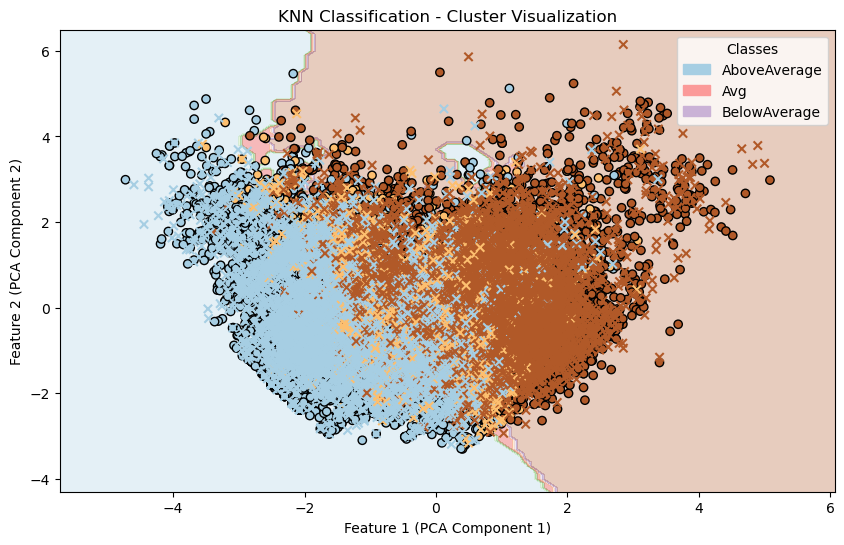

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.patches as mpatches

# Step 1: Reduce features to 2D for visualization using PCA (if more than 2 features)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Re-train the KNN model on 2D data
knn.fit(X_train_2d, y_train)

# Step 2: Define a grid for decision boundary visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Step 3: Predict on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)

# Map string labels in Z to numeric values
unique_labels = np.unique(Z)  # Get unique string labels
label_to_numeric = {label: idx for idx, label in enumerate(unique_labels)}  # Map labels to numbers
Z_numeric = np.array([label_to_numeric[label] for label in Z])  # Convert Z to numeric
Z_numeric = Z_numeric.reshape(xx.shape)  # Reshape for contour plot

# Step 4: Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.Paired)

# Step 5: Scatter plot training points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                       c=y_train.map(label_to_numeric),  # Map y_train to numeric
                       edgecolor='k', cmap=plt.cm.Paired, label='Train')

# Scatter plot test points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1],
            c=y_test.map(label_to_numeric),  # Map y_test to numeric
            marker='x', edgecolor='k', cmap=plt.cm.Paired, label='Test')



# Step 6: Add labels, legend, and title
plt.title('KNN Classification - Cluster Visualization')
plt.xlabel('Feature 1 (PCA Component 1)')
plt.ylabel('Feature 2 (PCA Component 2)')

# Create a manual legend using the unique labels and their corresponding colors
legend_handles = [mpatches.Patch(color=plt.cm.Paired(label_to_numeric[label] / len(unique_labels)), 
                                 label=label) for label in unique_labels]

plt.legend(handles=legend_handles, title="Classes")
plt.show()



In [27]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the model
nb = GaussianNB() 

# Step 3: Train the model
nb.fit(X_train, y_train)

# Step 4: Predict
y_pred = nb.predict(X_test)

# Step 5: Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7904300423985463
Confusion Matrix:
 [[3717   49  555]
 [ 523   69  595]
 [ 502  198 5349]]
Classification Report:
               precision    recall  f1-score   support

AboveAverage       0.78      0.86      0.82      4321
         Avg       0.22      0.06      0.09      1187
BelowAverage       0.82      0.88      0.85      6049

    accuracy                           0.79     11557
   macro avg       0.61      0.60      0.59     11557
weighted avg       0.75      0.79      0.76     11557

